In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# data = pd.read_csv("./data/ner_dataset.csv", encoding="latin1")
data = pd.read_pickle("C://Users//ILIFO-001//소스//gy_ner.pkl")

In [3]:
data

,Sentence #,Word,POS,Tag
0,sentence_00002_NER_1,오에,NNG,B-PER
1,sentence_00002_NER_1,겐자부로,NNP,I-PER
2,sentence_00002_NER_1,는,JX,O
3,sentence_00002_NER_1,일본,NNP,B-LOC
4,sentence_00002_NER_1,현대,NNG,O
...,...,...,...,...
643426,sentence_EXOBRAIN_NE_CORPUS_010_1892,구입해,VV+EC,O
643427,sentence_EXOBRAIN_NE_CORPUS_010_1892,기증한,VV+ETM,O
643428,sentence_EXOBRAIN_NE_CORPUS_010_1892,것,NNB,O
643429,sentence_EXOBRAIN_NE_CORPUS_010_1892,이,VCP,O


In [4]:
print('데이터프레임 행의 개수 : {}'.format(len(data)))

데이터프레임 행의 개수 : 643431


In [5]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : True


In [6]:
print('어떤 열에 Null값이 있는지 출력')
print('==============================')
data.isnull().sum()

어떤 열에 Null값이 있는지 출력


Sentence #    0
Word          0
POS           3
Tag           0
dtype: int64

In [7]:
print('sentence # 열의 중복을 제거한 값의 개수 : {}'.format(data['Sentence #'].nunique()))
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))
print('Tag 열의 중복을 제거한 값의 개수 : {}'.format(data.Tag.nunique()))

sentence # 열의 중복을 제거한 값의 개수 : 23115
Word 열의 중복을 제거한 값의 개수 : 46349
Tag 열의 중복을 제거한 값의 개수 : 21


In [8]:
print('Tag 열의 각각의 값의 개수 카운트')
print('================================')
print(data.groupby('Tag').size().reset_index(name='count'))

Tag 열의 각각의 값의 개수 카운트
      Tag   count
0   B-DAT    6682
1   B-DUR    1584
2   B-LOC    7800
3   B-MNY    1618
4   B-NOH   16201
5   B-ORG   17064
6   B-PER   18414
7   B-PNT    1888
8   B-POH    8341
9   B-TIM     483
10  I-DAT    7666
11  I-DUR    2739
12  I-LOC    3140
13  I-MNY    3675
14  I-NOH   15974
15  I-ORG    9294
16  I-PER    4032
17  I-PNT     360
18  I-POH   12416
19  I-TIM    1241
20      O  502819


In [9]:
data = data.fillna(method="ffill")

In [10]:
print(data.tail())

                                  Sentence # Word     POS Tag
643426  sentence_EXOBRAIN_NE_CORPUS_010_1892  구입해   VV+EC   O
643427  sentence_EXOBRAIN_NE_CORPUS_010_1892  기증한  VV+ETM   O
643428  sentence_EXOBRAIN_NE_CORPUS_010_1892    것     NNB   O
643429  sentence_EXOBRAIN_NE_CORPUS_010_1892    이     VCP   O
643430  sentence_EXOBRAIN_NE_CORPUS_010_1892    다      EC   O


In [11]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : False


In [12]:
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 개수 : 46137


In [13]:
print(data[:5])

             Sentence #  Word  POS    Tag
0  sentence_00002_NER_1    오에  NNG  B-PER
1  sentence_00002_NER_1  겐자부로  NNP  I-PER
2  sentence_00002_NER_1     는   JX      O
3  sentence_00002_NER_1    일본  NNP  B-LOC
4  sentence_00002_NER_1    현대  NNG      O


In [14]:
func = lambda temp: [(w, t) for w, t in zip(temp["Word"].values.tolist(), temp["Tag"].values.tolist())]
tagged_sentences=[t for t in data.groupby("Sentence #").apply(func)]
print("전체 샘플 개수: {}".format(len(tagged_sentences)))

전체 샘플 개수: 23115


In [15]:
print(tagged_sentences[0]) # 첫번째 샘플 출력

[('오에', 'B-PER'), ('겐자부로', 'I-PER'), ('는', 'O'), ('일본', 'B-LOC'), ('현대', 'O'), ('문학', 'O'), ('의', 'O'), ('초석', 'O'), ('을', 'O'), ('놓', 'O'), ('은', 'O'), ('것', 'O'), ('으로', 'O'), ('평가', 'O'), ('받', 'O'), ('는', 'O'), ('작가', 'O'), ('나쓰메', 'B-PER'), ('소세키', 'I-PER'), ('1867', 'B-DUR'), ('1916', 'I-DUR'), ('의', 'O'), ('대표작', 'O'), ('마음', 'B-POH'), ('에', 'O'), ('담긴', 'O'), ('군국주의', 'O'), ('적', 'O'), ('요소', 'O'), ('야스쿠니', 'B-ORG'), ('신사', 'I-ORG'), ('참배', 'O'), ('행위', 'O'), ('까지', 'O'), ('소설', 'O'), ('의', 'O'), ('삽화', 'O'), ('로', 'O'), ('동원하', 'O'), ('며', 'O'), ('일본', 'B-ORG'), ('사회', 'O'), ('의', 'O'), ('비정상', 'O'), ('성', 'O'), ('을', 'O'), ('문제', 'O'), ('삼', 'O'), ('는다', 'O')]


In [16]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 47,959개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

In [17]:
print(sentences[0])
print(ner_tags[0])

['오에', '겐자부로', '는', '일본', '현대', '문학', '의', '초석', '을', '놓', '은', '것', '으로', '평가', '받', '는', '작가', '나쓰메', '소세키', '1867', '1916', '의', '대표작', '마음', '에', '담긴', '군국주의', '적', '요소', '야스쿠니', '신사', '참배', '행위', '까지', '소설', '의', '삽화', '로', '동원하', '며', '일본', '사회', '의', '비정상', '성', '을', '문제', '삼', '는다']
['B-PER', 'I-PER', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'B-DUR', 'I-DUR', 'O', 'O', 'B-POH', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [18]:
print(sentences[98])
print(ner_tags[98])

['북한', '이탈', '주민', '을', '위한', '창업', '교육', '도', '한다']
['B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 371
샘플의 평균 길이 : 27.836080


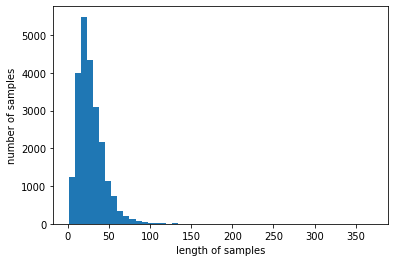

In [19]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만 인덱스 1에는 단어 'OOV'를 할당한다.
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
tar_tokenizer.fit_on_texts(ner_tags)

In [21]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 46139
개체명 태깅 정보 집합의 크기 : 22


In [22]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [23]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [24]:
print(X_train[0])
print(y_train[0])

[23871, 23872, 4, 101, 724, 2543, 6, 23873, 3, 452, 8, 23, 15, 310, 55, 4, 1095, 23874, 23875, 23876, 23877, 6, 11049, 516, 7, 2444, 13261, 171, 2852, 16829, 6730, 3885, 1263, 46, 2445, 6, 16830, 16, 16831, 33, 101, 405, 6, 4345, 361, 3, 191, 1198, 270]
[2, 12, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 12, 18, 15, 1, 1, 8, 1, 1, 1, 1, 1, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1]


In [25]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word
index_to_ner[0]='PAD'

In [26]:
print(index_to_ner)

{1: 'O', 2: 'B-PER', 3: 'B-ORG', 4: 'B-NOH', 5: 'I-NOH', 6: 'I-POH', 7: 'I-ORG', 8: 'B-POH', 9: 'B-LOC', 10: 'I-DAT', 11: 'B-DAT', 12: 'I-PER', 13: 'I-MNY', 14: 'I-LOC', 15: 'I-DUR', 16: 'B-PNT', 17: 'B-MNY', 18: 'B-DUR', 19: 'I-TIM', 20: 'B-TIM', 21: 'I-PNT', 0: 'PAD'}


In [27]:
decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['오에', '겐자부로', '는', '일본', '현대', '문학', '의', '초석', '을', '놓', '은', '것', '으로', '평가', '받', '는', '작가', '나쓰메', '소세키', '1867', '1916', '의', '대표작', '마음', '에', '담긴', '군국주의', '적', '요소', '야스쿠니', '신사', '참배', '행위', '까지', '소설', '의', '삽화', '로', '동원하', '며', '일본', '사회', '의', '비정상', '성', '을', '문제', '삼', '는다']
디코딩 문장 : ['오에', '겐자부로', '는', '일본', '현대', '문학', '의', '초석', '을', '놓', '은', '것', '으로', '평가', '받', '는', '작가', '나쓰메', '소세키', '1867', '1916', '의', '대표작', '마음', '에', '담긴', '군국주의', '적', '요소', '야스쿠니', '신사', '참배', '행위', '까지', '소설', '의', '삽화', '로', '동원하', '며', '일본', '사회', '의', '비정상', '성', '을', '문제', '삼', '는다']


In [28]:
max_len = 125
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [30]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [31]:
print('train 데이터 : {}'.format(X_train.shape))
print('train 레이블 : {}'.format(y_train.shape))
print('test 데이터 : {}'.format(X_test.shape))
print('test 레이블 : {}'.format(y_test.shape))

train 데이터 : (18492, 125)
train 레이블 : (18492, 125, 22)
test 데이터 : (4623, 125)
test 레이블 : (4623, 125, 22)


---

In [32]:
import pickle

In [34]:
pkl_data = (X_train, X_test, y_train, y_test)
pd.to_pickle(pkl_data, 'ner_kor_dataset.pkl')

In [35]:
X_train, X_test, y_train, y_test = pd.read_pickle('ner_kor_dataset.pkl')

In [36]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (18492, 125)
훈련 샘플 레이블의 크기 : (18492, 125, 22)
테스트 샘플 문장의 크기 : (4623, 125)
테스트 샘플 레이블의 크기 : (4623, 125, 22)
